In [47]:
import pandas as pd
import plotly.express as px
import numpy
from plotly.subplots import make_subplots

In [48]:
price_df = pd.read_csv("../../datastore/prices.csv")
price_df

,Symbol,base,quote,Kline open time,Open price,High price,Low price,Close price,Volume,Kline Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,ETHBTC,ETH,BTC,1669395600000,0.072026,0.072222,0.072026,0.072222,1342.1624,1669397399999,96.776126,2657,794.6663,57.298344
1,ETHBTC,ETH,BTC,1669397400000,0.072222,0.072335,0.072117,0.072162,1185.9640,1669399199999,85.640393,2727,560.9044,40.508977
2,ETHBTC,ETH,BTC,1669399200000,0.072163,0.072263,0.072101,0.072189,813.4793,1669400999999,58.717779,1862,359.8931,25.975732
3,ETHBTC,ETH,BTC,1669401000000,0.072188,0.072261,0.072161,0.072212,936.2168,1669402799999,67.599402,1816,470.6928,33.988586
4,ETHBTC,ETH,BTC,1669402800000,0.072223,0.072479,0.072197,0.072375,1115.5725,1669404599999,80.727099,3088,593.4310,42.945939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1201477,BUSDRON,BUSD,RON,1670943600000,4.629000,4.630000,4.620000,4.621000,5984.0000,1670945399999,27672.337000,108,2086.0000,9651.160000
1201478,BUSDRON,BUSD,RON,1670945400000,4.620000,4.631000,4.620000,4.630000,3618.0000,1670947199999,16734.982000,42,1642.0000,7593.482000
1201479,BUSDRON,BUSD,RON,1670947200000,4.631000,4.631000,4.630000,4.631000,3254.0000,1670948999999,15069.018000,33,2998.0000,13883.738000
1201480,BUSDRON,BUSD,RON,1670949000000,4.630000,4.631000,4.630000,4.631000,14415.0000,1670950799999,66749.027000,92,7577.0000,35089.087000


----
### <center>📜 Question 1: How 4 prices correlation with each other ?</center>

#### Benifits of finding the answer:
- After this we can know that we need to focus in all 4 prices or just need some of them
- If they correlated, how it look like in the realtime ?
#### Answer:
- Calculate the correlation and plot the price graph for a more specific perspective

In [49]:
price_only_df = price_df[["Open price", "High price", "Low price", "Close price"]]
corr = price_only_df.corr()
corr

,Open price,High price,Low price,Close price
Open price,1.000000,0.999988,0.999991,0.999997
High price,0.999988,1.000000,0.999963,0.999989
Low price,0.999991,0.999963,1.000000,0.999990
Close price,0.999997,0.999989,0.999990,1.000000


> From the table, we can see that that they seem to be look the same with each other

Now we try to plot them in to a graph

In [50]:
price_and_time_df = price_df.loc[price_df["Symbol"] == "BTCUSDT"].set_index("Kline open time")[["Open price", "High price", "Low price", "Close price"]]
price_and_time_df.index = pd.to_datetime(price_and_time_df.index, unit="ms")
price_and_time_df.sort_index(inplace=True)

In [51]:
price_and_time_df

,Open price,High price,Low price,Close price
Kline open time,,,,
2022-11-25 17:00:00,16485.14,16512.43,16474.29,16483.27
2022-11-25 17:30:00,16483.27,16536.35,16482.98,16510.38
2022-11-25 18:00:00,16509.52,16528.60,16502.77,16509.40
2022-11-25 18:30:00,16508.95,16518.59,16477.13,16495.43
2022-11-25 19:00:00,16495.43,16553.88,16494.01,16515.20
...,...,...,...,...
2022-12-13 15:00:00,17871.78,17887.41,17735.73,17762.98
2022-12-13 15:30:00,17762.98,17795.94,17731.00,17752.94
2022-12-13 16:00:00,17753.54,17819.84,17752.78,17796.48


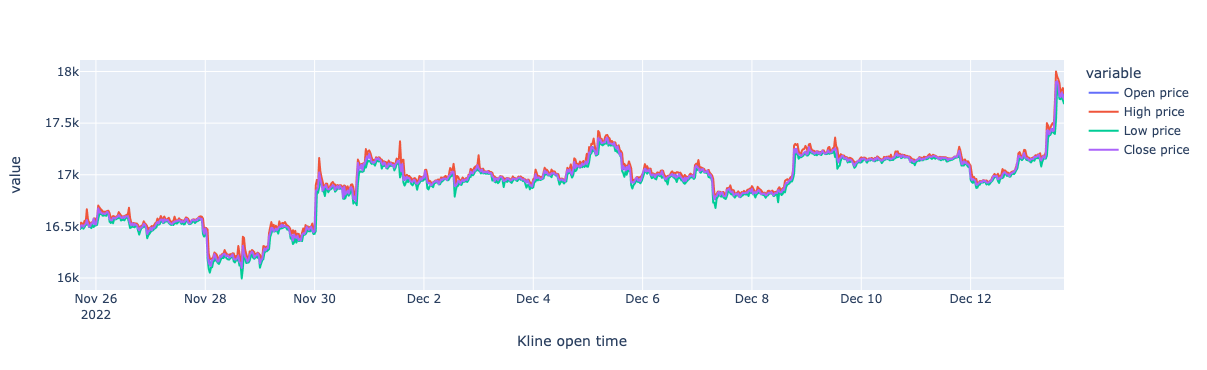

In [52]:
fig = px.line(price_and_time_df, x=price_and_time_df.index, y=["Open price", "High price", "Low price", "Close price"])
fig.show()

> with the line graph, we also can we that all 4 prices that look nearly like the same, but there still have some fixed difference between them, so we can't conclude that should we drop some of them, because these prices is very importaint to make a successful trade

----
### <center>📜 Question 2: Is the number of trade affect to the price of the token ?</center>

#### Benifits of finding the answer:
- After this we can know that can we base on the trading trend of people to predict the next move of our trading
- And this maybe can prove that the token prices can be affected by human 
#### Answer:

In [53]:
price_df[price_df.Symbol == 'ETHBTC'][['Open price','High price','Low price','Close price','Number of trades']].corr(method='kendall')[['Number of trades']]

,Number of trades
Open price,0.013891
High price,0.049964
Low price,-0.018578
Close price,0.017173
Number of trades,1.000000


>It seem to be there is nothing that affect by `number of trades`

Try to plot it in a graph

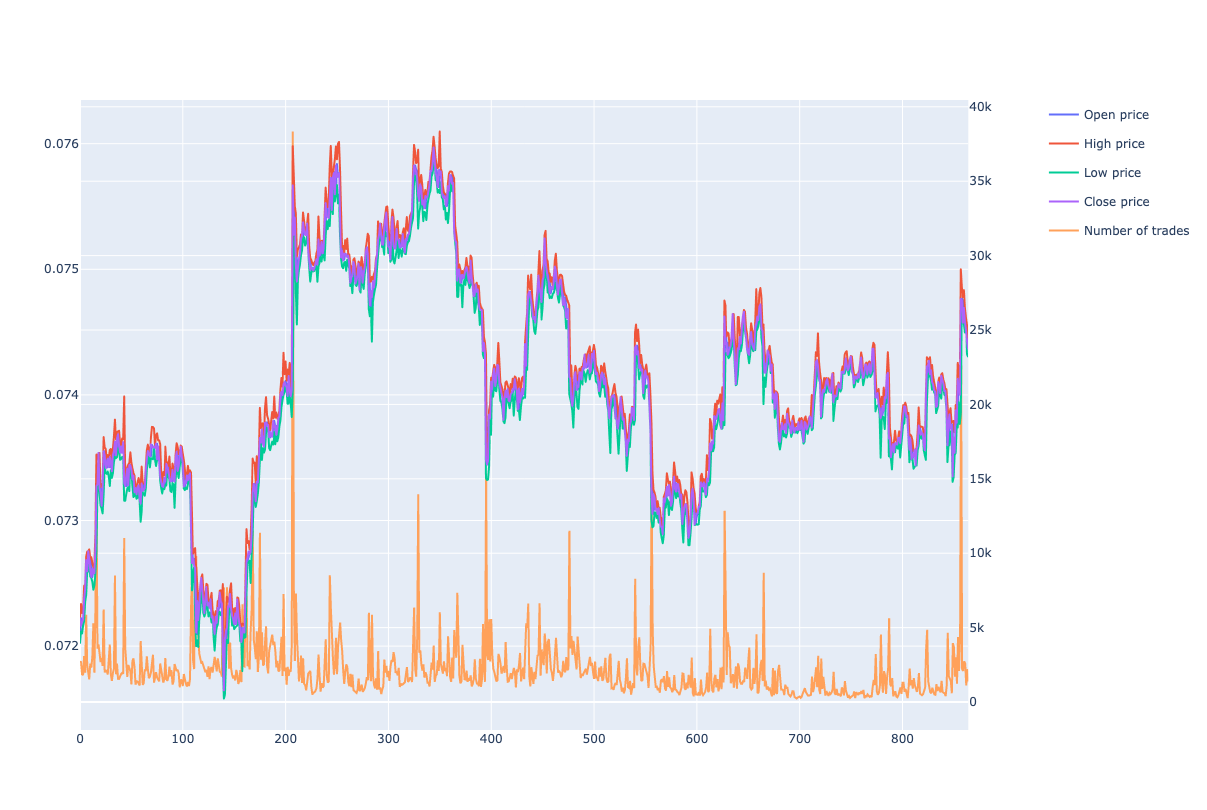

In [54]:
fig = px.line(price_df[price_df.Symbol == 'ETHBTC'], x=price_df[price_df.Symbol == 'ETHBTC'].index, y=["Open price", "High price", "Low price", "Close price"])
fig2 = px.line(price_df[price_df.Symbol == 'ETHBTC'], x=price_df[price_df.Symbol == 'ETHBTC'].index, y=["Number of trades"])
fig2.update_traces(yaxis="y2")
subfig = make_subplots(specs=[[{"secondary_y": True}]])
subfig.add_traces(fig.data + fig2.data)
# recoloring is necessary otherwise lines from fig und fig2 would share each color
# e.g. Linear-, Log- = blue; Linear+, Log+ = red... we don't want this
subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.update_layout(height=800)
subfig.show()

> Although the correlation is almost nonexistent, at times when the number of transactions is suddenly high or low, at that time the 4 rate level is also strongly affected, so it can be seen that the quantity is Trading has no lasting effect on time, but is also a sign of strong price movement

----
### <center>📜 Question 3: Is the price of symbols correlation with each other ?</center>

#### Benifits of finding the answer:
- After this we can know that can we predict the price base on other symbol
- Verify if the market is prone to crash (From the case of the token LUNA)
#### Answer:
- Make the new data_set that is the prices of all symbols base on time
- Then calulate the correlation of them
- Take the symbols pair with the high correlation

In [55]:
symbol_corr = price_df.pivot(index='Kline open time',columns='Symbol')['High price'].corr()

In [56]:
symbol_corr.describe().mean(axis = 1)

count    1394.000000
mean        0.153843
std         0.367507
min        -0.762683
25%        -0.133610
50%         0.187178
75%         0.456969
max         1.000000
dtype: float64

> from this we can see that it seem that not much correlation in symbols prices

In [57]:
top = dict(zip([i + ' ' + j for i in symbol_corr.columns for j in symbol_corr.columns],symbol_corr.to_numpy().flatten())) #chuyen thanh dictionary
top = {key:val for key, val in top.items() 
                if key.split() != key.split()[::-1]  # tự so với bản thân
                and 'UP' not in key and 'DOWN' not in key and  # các đống up down (thực sự không mang nhiều ý nghĩa)
                abs(val)  >= 0.95}  #giá trị tương quan phải cao
top = numpy.array(sorted(top.items(), key=lambda kv: kv[1]))#sort
top = top[::2] # remove duplicate

In [58]:
symbols = price_df.drop_duplicates(subset='Symbol')[['Symbol','base','quote']]
new_top = []
for i in top:
    a,b = i[0].split(' ')
    if symbols[(symbols.Symbol == a)|(symbols.Symbol == b)][['base','quote']].unstack().nunique() == 4:
        new_top += [i]        

In [59]:
len(new_top),new_top

(115,
 [array(['RUNEBNB TFUELBTC', '-0.9614654162500887'], dtype='<U32'),
  array(['RUNEBNB XLMBTC', '-0.9610995141412478'], dtype='<U32'),
  array(['BUSDUSDT MATICBNB', '-0.9594465345665986'], dtype='<U32'),
  array(['TFUELBTC XMRBNB', '-0.9594032674993581'], dtype='<U32'),
  array(['RUNEBNB XLMETH', '-0.9555043076388604'], dtype='<U32'),
  array(['HBARBTC RUNEBNB', '-0.953430104926986'], dtype='<U32'),
  array(['ETCETH XMRBNB', '-0.952206825285223'], dtype='<U32'),
  array(['ETCBTC XMRBNB', '-0.9517356889522204'], dtype='<U32'),
  array(['ETCETH RUNEBNB', '-0.9516336112746239'], dtype='<U32'),
  array(['CHZEUR FLOWUSDT', '0.9500952564600174'], dtype='<U32'),
  array(['PORTOEUR SANTOSUSDT', '0.9501128334384525'], dtype='<U32'),
  array(['ADABTC CHZEUR', '0.9501140997102067'], dtype='<U32'),
  array(['STORJBTC TFUELBUSD', '0.950185389728831'], dtype='<U32'),
  array(['CHZTRY PORTOBUSD', '0.9502345671593191'], dtype='<U32'),
  array(['LAZIOTRY SANTOSBUSD', '0.9503583640119192'], dtype='

> Have 115 pairs, but most of them are have `stable coin` in each pair, so that seem make no sense that symbols affect each other